In [1]:
# TensorFlow and Keras for deep learning
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

# Optional: for plotting sample digits
import matplotlib.pyplot as plt


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
Training data shape: (60000, 28, 28), Labels: (60000,)
Test data shape: (10000, 28, 28), Labels: (10000,)


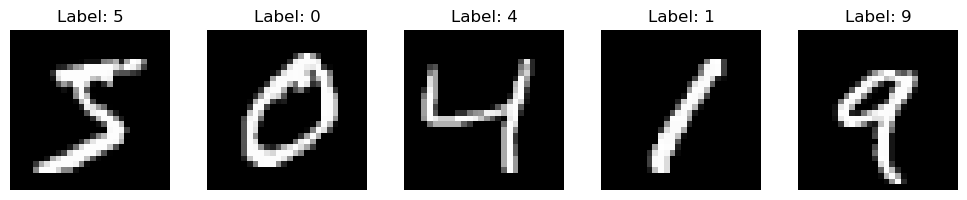

In [2]:
# Load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Display dataset shapes
print(f"Training data shape: {x_train.shape}, Labels: {y_train.shape}")
print(f"Test data shape: {x_test.shape}, Labels: {y_test.shape}")

# Plot first 5 sample digits with labels
plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


In [5]:
# Convert pixel values from 0–255 to 0–1 (float)
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0


In [7]:
# Reshape input data to be [samples, 784] for Dense layers
x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)


In [9]:
# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Check shape
print(f"One-hot encoded labels shape: {y_train.shape}")


One-hot encoded labels shape: (60000, 10)


In [13]:
from tensorflow.keras import Input

# Build the model with Input layer explicitly
model = Sequential([
    Input(shape=(784,)),                # Input layer
    Dense(128, activation='relu'),      # Hidden layer
    Dense(10, activation='softmax')     # Output layer for 10 digits
])


In [15]:
# Compile the model with optimizer, loss, and metrics
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [17]:
# Train the model with training data
history = model.fit(
    x_train, y_train,
    epochs=5,
    batch_size=32,
    validation_split=0.2
)


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8676 - loss: 0.4764 - val_accuracy: 0.9564 - val_loss: 0.1549
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9586 - loss: 0.1382 - val_accuracy: 0.9624 - val_loss: 0.1267
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9741 - loss: 0.0896 - val_accuracy: 0.9666 - val_loss: 0.1114
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9812 - loss: 0.0626 - val_accuracy: 0.9630 - val_loss: 0.1187
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9858 - loss: 0.0519 - val_accuracy: 0.9708 - val_loss: 0.0996


In [19]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(x_test, y_test)

print(f"\nTest Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9704 - loss: 0.0956

Test Accuracy: 0.9749
Test Loss: 0.0846


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


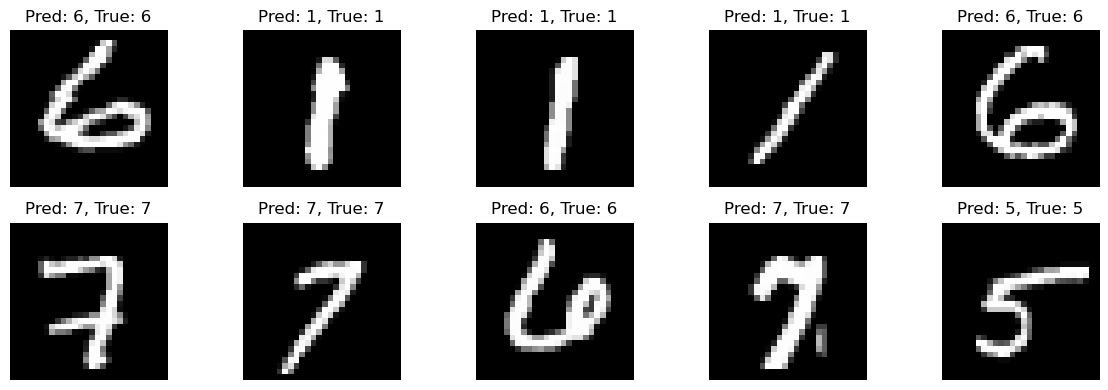

In [21]:
import numpy as np

# Predict on test data
predictions = model.predict(x_test)

# Convert predictions from one-hot to actual labels
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)

# Show 10 random test samples with predictions
plt.figure(figsize=(12, 4))
for i in range(10):
    index = np.random.randint(0, len(x_test))
    image = x_test[index].reshape(28, 28)  # Reshape back to 2D for viewing
    plt.subplot(2, 5, i + 1)
    plt.imshow(image, cmap='gray')
    plt.title(f"Pred: {predicted_labels[index]}, True: {true_labels[index]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


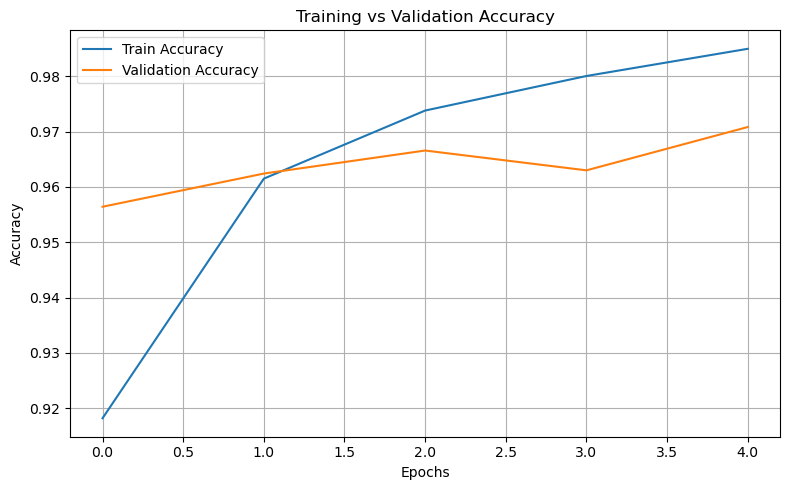

In [23]:
# Plot accuracy curves
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [25]:
# Save the model to a file
model.save("mnist_dense_model.h5")
print("✅ Model saved as mnist_dense_model.h5")


✅ Model saved as mnist_dense_model.h5
